<a href="https://colab.research.google.com/github/VerFabiola/Math-509-test/blob/main/NEWSWEBSCRAPING_VERANEFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install requests beautifulsoup4 pandas

In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import random
import pandas as pd
import torch
from transformers import pipeline
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#WEBSCRAPING FROM DIFFERENTS NEWS ARTICLES (64)

In [6]:

# List of article URLs to scrape
article_urls = [
    'https://www.brookings.edu/articles/how-artificial-intelligence-will-affect-the-future-of-energy-and-climate/',
    'https://www.theguardian.com/environment/2025/feb/18/early-warning-system-for-climate-tipping-points-given-81m-kickstart?utm_source=chatgpt.com',
    'https://news.mit.edu/2025/explained-generative-ai-environmental-impact-0117',
    'https://www.cnn.com/2024/07/03/tech/google-ai-greenhouse-gas-emissions-environmental-impact/index.html',
    'https://www.techpolicy.press/hope-the-ai-acts-approach-to-address-the-environmental-impact-of-ai/',
    'https://www.mckinsey.com/capabilities/quantumblack/our-insights/ai-for-social-good',
    'https://www.bbc.com/news/articles/c51yvz51k2xo',
    'https://www.theguardian.com/commentisfree/2023/dec/23/ai-chat-gpt-environmental-impact-energy-carbon-intensive-technology',
    'https://www.theguardian.com/technology/article/2024/jul/07/how-ai-is-helping-us-tackle-the-climate-crisis',
    'https://medium.com/towards-data-science/environmental-implications-of-the-ai-boom-279300a24184',
    'https://novaqore.medium.com/the-hidden-cost-of-ai-environmental-impact-and-sustainable-solutions-4e3641c5c25c',
    'https://www.bbc.com/news/science-environment-65913940',
    'https://www.forbes.com/sites/cindygordon/2024/02/25/ai-is-accelerating-the-loss-of-our-scarcest-natural-resource-water/',
    'https://www.techtarget.com/searchDataCenter/feature/How-the-rise-in-AI-impacts-data-centers-and-the-environment',
    'https://blog.emb.global/ai-energy-consumption-eco-impact-for-sustainable-innovation/#q-what-are-the-environmental-concerns-related-to-ai-energy-usage',
    'https://www.msn.com/en-us/technology/artificial-intelligence/the-false-ai-energy-crisis/ar-AA1yQz7S?ocid=BingNewsSerp',
    'https://climate.mit.edu/ask-mit/ais-energy-use-big-problem-climate-change',
    'https://www.lse.ac.uk/granthaminstitute/explainers/what-opportunities-and-risks-does-ai-present-for-climate-action/',
    'https://www.nature.com/articles/s42256-020-0219-9',
    'https://planetdetroit.org/2024/10/ai-energy-carbon-emissions/',
    'https://www.snopes.com/news/2025/01/16/ai-environment-carbon-footprint/',
    'https://climate.mit.edu/ask-mit/ais-energy-use-big-problem-climate-change',
    'https://www.eolianenergy.com/press/ai-is-exhausting-the-power-grid-tech-firms-are-seeking-a-miracle-solution',
    'https://cpen.ai/amazon-google-and-microsoft-turn-to-nuclear-power-for-ai-energy-needs/',
    'https://globalnews.ca/news/11011068/trudeau-paris-artificial-intelligence-summit/',
    'https://www.pressreader.com/',
    'https://www.scientificamerican.com/article/ais-climate-impact-goes-beyond-its-emissions/',
    'https://www.greenmatch.co.uk/blog/technology-environmental-impact',
    'https://enviroliteracy.org/how-can-technology-help-the-environment/',
    'https://www.lseg.com/en/insights/ai-environmental-impact-from-vicious-circle-to-virtuous',
    'https://newatlas.com/architecture/carlo-ratti-maestro-ai/',
    'https://newatlas.com/technology/nvidia-ai-earth-2-weather-data-climate-action/',
    'https://newatlas.com/technology/ai-index-report-negatives/',
    'https://techcrunch.com/2025/02/11/chatgpt-may-not-be-as-power-hungry-as-once-assumed/',
    'https://techcrunch.com/2025/03/20/nvidia-thinks-ai-can-solve-electrical-grid-problems-caused-by-ai/',
    'https://techcrunch.com/2025/02/11/microsoft-powers-ai-ambitions-with-400-mw-solar-purchase/',
    'https://techcrunch.com/2025/02/06/orgs-demand-action-to-mitigate-ais-environmental-harm/',
    'https://techcrunch.com/2025/01/02/2025-will-be-the-year-climate-tech-learns-to-love-ai/',
    'https://futurism.com/bill-gates-gives-up-climate-change',
    'https://futurism.com/artificial-leaf-carbon-sustainable-fuel',
    'https://www.defensenews.com/news/your-military/2024/10/08/how-the-army-is-using-ai-during-hurricane-helene-relief/',
    "https://hackaday.com/2025/02/21/genetic-algorithm-runs-on-atari-800-xl/",
    "https://www.npr.org/2025/03/12/nx-s1-5319056/trump-clean-energy-electricity-climate-change",
    "https://www.theverge.com/command-line-newsletter/630037/anthropic-plan-win-ai-race-mike-krieger",
    "https://www.businessinsider.com/small-modular-reactor-venture-capital-ai-data-centers-2025-3",
    "https://iopscience.iop.org/article/10.1088/1361-6404/ada1af",
    "https://www.forbes.com/sites/dianneplummer/2025/02/19/power-plant-losses-and-ai-tackling-inefficiencies-for-sustainability/",
    "https://www.rockpapershotgun.com/playerunknowns-prologue-go-wayback-is-an-enchanting-exploration-sim-tossed-on-a-sea-of-metaverse-imagineering",
    "https://www.wired.com/story/startup-nations-donald-trump-legislation/",
    "https://www.forbes.com/sites/kensilverstein/2024/03/11/how-will-artificial-intelligence-impact-inequality-and-energy/?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_376",
    'https://www.theguardian.com/technology/article/2024/jul/02/google-ai-emissions?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_392',
    #"https://www.marktechpost.com/2021/11/05/the-future-direction-and-vision-for-ai/?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_246",
    "https://www.technologyreview.com/2019/06/20/134864/ai-climate-change-machine-learning/",
    #"https://venturebeat.com/ai/how-ai-will-drive-the-hybrid-work-environment/?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_258",
    #"https://www.bloomberg.com/news/articles/2024-06-26/bill-gates-says-ai-will-advance-green-tech-offsetting-its-emissions?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_391",
    "https://www.ey.com/en_in/insights/technology/how-ai-and-automation-make-data-centers-greener-and-more-sustainable?utm_campaign=Artificial%2BIntelligence%2BWeekly&utm_medium=web&utm_source=Artificial_Intelligence_Weekly_308",
    "https://www.technologyreview.com/2021/01/21/1016460/transforming-the-energy-industry-with-ai/",
    "https://www.iea.org/commentaries/how-will-artificial-intelligence-transform-energy-innovation",
    "https://www.iea.org/commentaries/why-ai-and-energy-are-the-new-power-couple",
    "https://www.energy.gov/policy/articles/how-ai-can-help-clean-energy-meet-growing-electricity-demand",
    "https://www.japantimes.co.jp/commentary/2025/01/03/world/ai-energy-demands/",
    #"https://www.weforum.org/stories/2024/07/generative-ai-energy-emissions/",
    "https://www.nature.com/articles/d41586-025-00616-z",
    "https://climate.mit.edu/ask-mit/ais-energy-use-big-problem-climate-change",
    "https://climate.mit.edu/posts/four-ways-ai-making-power-grid-faster-and-more-resilient",
    "https://climate.mit.edu/posts/explained-generative-ais-environmental-impact",
    "https://techcrunch.com/2025/01/27/how-deepseeks-efficient-ai-could-stall-the-nuclear-renaissance/",
    'https://ca.news.yahoo.com/alberta-wants-build-huge-data-162403947.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuYmluZy5jb20v&guce_referrer_sig=AQAAADgyIDMyKLkU_JBqT_UwN91LltiL0UhN9UIA9J_D_CzbRl2dpE8lLrpPJdxelmfE0jV1fK7_8KnvwFfdUobZegu827ltTzwpn7IPV4Dm5KSGCxS4yjkR3NPU2MGvEuoSdx1jJvi-dVXAoal9BGtAgNh4TfrMf9j7R7VYMorGPGOx'

]

# Rotating user agents to reduce blocking
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
]

# Function to scrape article data and write it to CSV
def scrape_and_save_article(url, csv_writer):
    headers = {
        "User-Agent": random.choice(USER_AGENTS),
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raises exception for HTTP errors (4xx or 5xx)

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title, content, date (adjust selectors as needed)
        title = soup.find('h1')
        title = title.text.strip() if title else "No title found"

        content = soup.find('div', class_='article-body') or soup.find('article') or soup.find('div', class_='content')
        content = content.text.strip() if content else "No content found"

        date = soup.find('time')
        date = date.text.strip() if date else "No date found"

        # Write the article data to the CSV file
        csv_writer.writerow([title, content, date, url])
        print(f"Scraped: {url}")
    except requests.RequestException as e:
        print(f"Error scraping {url}: {e}")

# Open CSV file in write mode
with open('scraped_articles_1.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['title', 'content', 'date', 'url'])  # Write header

    # Loop through each article URL and scrape them one by one
    for url in article_urls:
        scrape_and_save_article(url, csv_writer)
        time.sleep(random.uniform(2, 5))  # Random sleep to avoid detection

print("Finished scraping all articles.")

Scraped: https://www.brookings.edu/articles/how-artificial-intelligence-will-affect-the-future-of-energy-and-climate/
Scraped: https://www.theguardian.com/environment/2025/feb/18/early-warning-system-for-climate-tipping-points-given-81m-kickstart?utm_source=chatgpt.com
Scraped: https://news.mit.edu/2025/explained-generative-ai-environmental-impact-0117
Scraped: https://www.cnn.com/2024/07/03/tech/google-ai-greenhouse-gas-emissions-environmental-impact/index.html
Scraped: https://www.techpolicy.press/hope-the-ai-acts-approach-to-address-the-environmental-impact-of-ai/
Scraped: https://www.mckinsey.com/capabilities/quantumblack/our-insights/ai-for-social-good
Scraped: https://www.bbc.com/news/articles/c51yvz51k2xo
Scraped: https://www.theguardian.com/commentisfree/2023/dec/23/ai-chat-gpt-environmental-impact-energy-carbon-intensive-technology
Scraped: https://www.theguardian.com/technology/article/2024/jul/07/how-ai-is-helping-us-tackle-the-climate-crisis
Scraped: https://medium.com/towa

In [7]:
df1=pd.read_csv('scraped_articles_1.csv')
print(df1.head())

                                               title  \
0  How artificial intelligence will affect the fu...   
1  Early warning system for climate tipping point...   
2    Explained: Generative AI’s environmental impact   
3  Google’s greenhouse gas emissions are soaring ...   
4  Hope: The AI Act’s Approach to Address the Env...   

                                             content              date  \
0  Trump’s executive order threatens to undermine...     No date found   
1  One tipping point thought to be at very high r...     No date found   
2  Rapid development and deployment of powerful g...  January 17, 2025   
3  The Google Bay View campus in Mountain View, C...     No date found   
4                                   No content found     No date found   

                                                 url  
0  https://www.brookings.edu/articles/how-artific...  
1  https://www.theguardian.com/environment/2025/f...  
2  https://news.mit.edu/2025/explained-generative... 

In [8]:

# List of URLs to scrape
urls_2 = [
    'https://aimagazine.com/ai-strategy/tracking-the-impact-of-ai-salesforces-ai-energy-score',
    'https://thoughtleadership.rbc.com/power-struggle-how-ai-is-challenging-canadas-electricity-grid/',
    'https://www.forbes.com/sites/joemckendrick/2025/03/14/the-implications-when-ai-becomes-as-common-as-electricity/',
    'https://www.imd.org/news/artificial-intelligence/big-ais-dirty-secret-the-environmental-cost-of-generative-ai/',
    'https://www.scientificamerican.com/article/ai-needs-to-be-more-energy-efficient/',
    'https://www.msn.com/en-us/technology/artificial-intelligence/can-energy-hungry-ai-help-cut-our-energy-use/ar-AA1Bzfto?ocid=BingNewsVerp',
    'https://www.analyticsinsight.net/artificial-intelligence/optimizing-ai-for-a-sustainable-future-innovations-in-compute-efficiency',
    'https://www.utsa.edu/today/2025/03/story/MATRIX-AI-growing-energy-footprint.html',
    'https://techbullion.com/innovations-in-ai-and-cloud-computing-a-sustainable-path-forward/',
    'https://www.eurekalert.org/news-releases/1077300',
    'https://www.project-syndicate.org/commentary/frugal-ai-not-the-solution-to-rising-energy-demand-by-boris-ruf-2025-03',
    'https://www.linkedin.com/pulse/we-ai-energy-bubble-latitude-media-inc-yegie/',
    'https://independentaustralia.net/business/business-display/ai-power-consumption-demands-a-rethink-for-energy-infrastructure,19513',
    'https://www.bmj.com/content/388/bmj.r505',
    'https://www.omanobserver.om/article/1167666/opinion/business/power-hungry-meeting-our-growing-energy-needs',
    'https://www.manilatimes.net/2025/03/18/tmt-newswire/globenewswire/icominer-sets-new-cloud-mining-standard-with-ai-efficiency-and-80-clean-energy/2074746',
    'https://techbullion.com/how-can-ai-contribute-to-daily-environmental-sustainability/',
    'https://www.nature.com/articles/d41586-025-00616-z',
    'https://www.fastcompany.com/91284274/how-ai-is-unlocking-a-cleaner-energy-future',
    'https://www.enterprisetimes.co.uk/2025/03/11/businesses-challenged-by-ais-high-energy-consumption-with-meeting-sustainability-goals-says-alibaba-research/',
    'https://www.reminetwork.com/articles/building-energy-management-the-ai-advantage/',
    'https://www.msn.com/en-ca/news/politics/opinion-ai-is-the-future-of-tech-but-its-effects-on-the-climate-could-change-everything/ar-AA1z7d22?ocid=BingNewsVerp',
    'https://www.msn.com/en-gb/technology/artificial-intelligence/is-ai-bad-for-the-environment-exploring-the-energy-usage-of-chatgpt-and-other-ai-tools/ar-AA1ykwuj?ocid=BingNewsVerp',
    'https://www.msn.com/en-us/technology/artificial-intelligence/the-false-ai-energy-crisis/ar-AA1yQz7S?ocid=BingNewsVerp',
    'https://techbullion.com/the-hidden-efficiency-of-gpus-debunking-ai-power-consumption-myths/',
    'https://mb.com.ph/2025/2/28/how-ai-can-protect-indigenous-lands-environment',
    'https://www.businessinsider.com/compostable-tableware-business-is-using-ai-to-stay-competitive-2025-3',
    'https://www.devdiscourse.com/article/science-environment/3309959-ai-powered-nudges-cut-water-and-energy-use-advance-conservation-efforts',
    'https://hbr.org/2025/02/ais-growing-waste-problem-and-how-to-solve-it?ab=HP-topics-text-7',
    'https://wildcat.arizona.edu/159304/news/how-your-ai-outlines-may-be-contributing-to-climate-change/',
    'https://www.msn.com/en-us/money/other/ai-is-bad-for-the-environment-and-the-problem-is-bigger-than-energy-consumption/ar-AA1y52Qg?ocid=BingNewsVerp',
    'https://www.ft.com/partnercontent/nvidia/paving-the-way-to-a-more-sustainable-world-with-the-latest-ai-innovation.html',
    'https://www.devdiscourse.com/article/science-environment/3309959-ai-powered-nudges-cut-water-and-energy-use-advance-conservation-efforts',
    'https://www.gulf-times.com/article/701934/opinion/why-frugal-ai-alone-wont-fix-ais-energy-problem',
    'https://www.msn.com/en-nz/news/other/ai-and-climate-how-machine-learning-is-improving-climate-predictions/ar-AA1yAgX6?ocid=BingNewsVerp',
]

# Rotating user agents to reduce blocking
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
]

# Function to scrape article data and write it to CSV
def scrape_and_save_article(url, csv_writer):
    headers = {
        "User-Agent": random.choice(USER_AGENTS),
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raises exception for HTTP errors (4xx or 5xx)

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title, content, date (adjust selectors as needed)
        title = soup.find('h1')
        title = title.text.strip() if title else "No title found"

        content = soup.find('div', class_='article-body') or soup.find('article') or soup.find('div', class_='content')
        content = content.text.strip() if content else "No content found"

        date = soup.find('time')
        date = date.text.strip() if date else "No date found"

        # Write the article data to the CSV file
        csv_writer.writerow([title, content, date, url])
        print(f"Scraped: {url}")
    except requests.RequestException as e:
        print(f"Error scraping {url}: {e}")

# Open CSV file in write mode
with open('scraped_articles_22.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['title', 'content', 'date', 'url'])  # Write header

    # Loop through each article URL and scrape them one by one
    for url in urls_2:
        scrape_and_save_article(url, csv_writer)
        time.sleep(random.uniform(2, 5))  # Random sleep to avoid detection

print("Finished scraping all articles.")

Error scraping https://aimagazine.com/ai-strategy/tracking-the-impact-of-ai-salesforces-ai-energy-score: 403 Client Error: Forbidden for url: https://aimagazine.com/ai-strategy/tracking-the-impact-of-ai-salesforces-ai-energy-score
Scraped: https://thoughtleadership.rbc.com/power-struggle-how-ai-is-challenging-canadas-electricity-grid/
Scraped: https://www.forbes.com/sites/joemckendrick/2025/03/14/the-implications-when-ai-becomes-as-common-as-electricity/
Scraped: https://www.imd.org/news/artificial-intelligence/big-ais-dirty-secret-the-environmental-cost-of-generative-ai/
Scraped: https://www.scientificamerican.com/article/ai-needs-to-be-more-energy-efficient/
Scraped: https://www.msn.com/en-us/technology/artificial-intelligence/can-energy-hungry-ai-help-cut-our-energy-use/ar-AA1Bzfto?ocid=BingNewsVerp
Scraped: https://www.analyticsinsight.net/artificial-intelligence/optimizing-ai-for-a-sustainable-future-innovations-in-compute-efficiency
Scraped: https://www.utsa.edu/today/2025/03/sto

In [9]:
df2 = pd.read_csv('scraped_articles_22.csv')
print(df2.head())

                                               title  \
0  Power Struggle: How AI is challenging Canada’s...   
1  The Implications When AI Becomes As Common As ...   
2  Big AI’s dirty secret: The environmental cost ...   
3               AI Needs to Be More Energy-Efficient   
4                                     No title found   

                                             content           date  \
0                                   No content found  No date found   
1  AI: It's everywhere nowgetty\nAI use is almost...  No date found   
2                                   No content found  No date found   
3  OpinionMarch 18, 20254 min readAI Needs to Be ...     April 2025   
4                                   No content found  No date found   

                                                 url  
0  https://thoughtleadership.rbc.com/power-strugg...  
1  https://www.forbes.com/sites/joemckendrick/202...  
2  https://www.imd.org/news/artificial-intelligen...  
3  https://www.s

In [10]:

# List of URLs to scrape
urls_3 = [
    'https://www.ecowatch.com/climate-tipping-points-early-warning-system-uk.html',
    'https://www.ecowatch.com/underwater-camera-fish-eating-coral.html',
    'https://www.ecowatch.com/agricultural-intelligence-terramera-2624424595.html',
    'https://www.ecowatch.com/data-centers-electricity-consumption-ireland.html',
    'https://www.barrons.com/articles/energy-security-climate-goals-ai-google-tech-microsoft-9d4c619f?mod=Searchresults',
    'https://www.ecowatch.com/ai-electricity-demand.html',
    'https://www.bloomberg.com/graphics/2024-ai-power-home-appliances/',
    'https://www.bloomberg.com/graphics/2024-ai-power-home-appliances/',
    'https://www.informationweek.com/machine-learning-ai/the-cost-of-ai-power-hunger-why-the-grid-can-t-support-ai',
    'https://www.powermag.com/powering-the-future-how-ais-energy-demands-could-push-power-grid-to-its-limits/',
    'https://www.deassociation.ca/newsfeed/power-struggle-how-ai-is-challenging-canadas-electricity-gridthe-8-critical-energy-trends-defining-2025-mltps',
    'https://www.renewableenergyworld.com/power-grid/outage-management/eatons-new-breakthrough-ai-powered-solution-could-help-utilities-strengthen-wildfire-prevention-efforts/',
    'https://www.anl.gov/article/revolutionizing-energy-grid-maintenance-how-artificial-intelligence-is-transforming-the-future',
    'https://www.thestar.com/globenewswire/verses-demonstrates-smart-building-energy-optimization/article_eda0d5ab-6294-57e6-992b-1a103af6b5f5.html',
    'https://environment.upenn.edu/events-insights/news/ai-and-environmental-challenges',
    'https://environment.yale.edu/news/article/can-we-mitigate-ais-environmental-impacts',
    'https://dataethics.eu/the-environmental-costs-of-generative-ai/',
    'https://www.weforum.org/stories/2024/02/ai-combat-climate-change/',
    'https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-1/AI_maps_icebergs_10_000_times_faster_than_humans',
    'https://www.techtarget.com/searchenterpriseai/news/366554716/How-machine-learning-can-combat-climate-change',
    'https://theconversation.com/data-science-could-help-californians-battle-future-wildfires-126316',
    'https://theconversation.com/is-generative-ai-bad-for-the-environment-a-computer-scientist-explains-the-carbon-footprint-of-chatgpt-and-its-cousins-204096',
    'https://www.artificialintelligence-news.com/news/ibm-hugging-face-ai-foundation-model-climate-science/',
    'https://www.gavi.org/vaccineswork/8-ways-ai-helping-tackle-climate-change?gad_source=1&gclid=Cj0KCQjwy46_BhDOARIsAIvmcwPN5-4AtSpueYJgGRqjt9kSl1kevOCfM88akPah46KUYmoEep5FN_kaAjREEALw_wcB',
    'https://www.climatechange.ai/blog/2023-06-02-citylearn',
    'https://deepmind.google/discover/blog/using-ai-to-fight-climate-change/',
    'https://www.msn.com/en-gb/money/technology/engineers-use-machine-learning-to-develop-world-first-national-level-flooding-model-for-turkey-as-climate-change-exacerbates-extreme-rainfall/ar-AA1tAaqQ?ocid=BingNewsVerp',
    'https://www.msn.com/en-us/news/technology/machine-learning-enables-customized-plastics-that-could-reduce-environmental-impact/ar-AA1B6EVO?ocid=BingNewsVerp',
    'https://www.msn.com/en-us/money/other/how-cities-use-ai-to-make-homes-and-buildings-more-sustainable/ar-AA1BlndY?ocid=BingNewsVerp',
    'https://www.crainsnewyork.com/crains-content-studio/ai-revolutionizing-energy-efficiency-commercial-buildings',
    'https://invezz.com/news/2025/03/20/nvidia-believes-ai-can-fix-the-energy-crisis-ai-is-fueling-heres-how/',
    'https://www.msn.com/en-gb/technology/artificial-intelligence/researchers-cut-ai-energy-use-by-90-with-smarter-leaner-models/ar-AA1BcIGG?ocid=BingNewsVerp',
    'https://www.fastcompany.com/91284274/how-ai-is-unlocking-a-cleaner-energy-future',
    'https://www.msn.com/en-us/news/technology/new-jersey-s-ai-ambitions-is-our-energy-supply-ready/ar-AA1BlBXG?ocid=BingNewsVerp',
    'https://energy.media/newsletter/ai-is-spiking-electricity-demand-now-what/',
    'https://interestingengineering.com/science/rhizonet-ai-tool-plant-roots?group=test_b',
    'https://interestingengineering.com/culture/americas-growing-ai-power-consumption-strained-grids-blackouts-and-nuclear-energy?group=test_b',
    'https://interestingengineering.com/innovation/sensors-detect-high-speed-protons-argonne?group=test_b',
    'https://www.politico.com/newsletters/power-switch/2024/10/18/an-ai-and-climate-vise-is-squeezing-the-power-grid-00184389',
    'https://www.canarymedia.com/newsletters/the-coming-ai-boom-could-keep-coal-and-gas-alive',
    'https://interestingengineering.com/innovation/sensors-detect-high-speed-protons-argonne?group=test_b',
    'https://theweek.com/tech/AI-climate-effects',
    'https://www.mariecuriealumni.eu/newsletters/39th-mcaa-newsletter/special-issue-hidden-costs-ai-science-environmental-impacts-and-solutions',
    'https://www.euronews.com/next/2024/05/24/ai-could-both-help-and-harm-the-environment-depending-on-how-its-used-piccard-says',
    'https://www.techrepublic.com/article/how-ai-could-save-the-environment/',
    'https://huggingface.co/blog/sasha/ai-environment-primer',
    'https://thefutureeconomy.ca/op-eds/ai-and-the-electric-grid-friends-or-foes/',
    'https://navigatepower.com/the-ai-revolution-in-solar-energy-innovations-that-are-reshaping-the-industry/',
    'https://www.informationweek.com/machine-learning-ai/the-cost-of-ai-power-hunger-why-the-grid-can-t-support-ai',
    'https://www.civilbeat.org/2024/08/ai-energy-use-is-straining-the-grid-and-slowing-sustainability-efforts/',
    'https://dentonrc.com/news/state/ai-could-strain-texas-power-grid-this-summer/article_17322b64-1de6-11ef-977e-67fc9f9abf0a.html'
    'http://www.cer-rec.gc.ca/en/data-analysis/energy-markets/market-snapshots/2024/market-snapshot-energy-demand-from-data-centers-is-steadily-increasing-and-ai-development-is-a-significant-factor.html',
    'https://www.weforum.org/stories/2021/09/time-to-utilise-the-full-power-of-ai-to-accelerate-our-fight-against-climate-change-301cb3f9d4/',
    'https://www.weforum.org/stories/2021/03/artificial-intelligence-is-key-to-grid-resilience/',
    'https://www.weforum.org/stories/2021/08/innovative-energy-storage-technologies-support-climate-goals/',
    'https://time.com/6987773/ai-data-centers-energy-usage-climate-change/',
    'https://www.analyticsinsight.net/artificial-intelligence/optimizing-ai-for-a-sustainable-future-innovations-in-compute-efficiency',
    'https://www.forbes.com/councils/forbestechcouncil/2025/03/27/breaking-the-planet-to-build-the-future-can-ais-environmental-price-be-mollified/',
    'https://www.imd.org/news/artificial-intelligence/big-ais-dirty-secret-the-environmental-cost-of-generative-ai/',
    'https://nationalpost.com/sponsored/news-sponsored/building-sustainability-into-ai-data-centre-infrastructure',
    'https://www.msn.com/en-us/technology/artificial-intelligence/understanding-the-impact-using-ai-can-have-oo-the-planet/ar-AA1BIrKt?ocid=BingNewsVerp',
    'https://www.msn.com/en-us/weather/topstories/climate-scientists-now-use-ai-to-predict-extreme-events/ar-AA1BGOpW?ocid=BingNewsVerp',
    'https://www.businessinsider.com/california-satellites-ai-to-combat-deadly-wildfires-2025-2',
    'https://www.forbes.com/councils/forbestechcouncil/2025/03/25/data-centers-are-powering-ais-rise-and-reinventing-themselves/',
    'https://hackernoon.com/earths-climate-is-being-hurt-by-ai-in-non-obvious-ways',
    'https://energycentral.com/c/gr/how-power-sector-applying-ai-improve-electric-grid',
    'https://ktar.com/arizona-technology-news/data-centers-environment/5686066/',
    'https://www.msn.com/en-us/money/companies/ai-demands-put-californias-power-grid-at-risk/ar-AA1BkILD?ocid=BingNewsVerp',
    'https://www.renewableenergyworld.com/electric-vehicle/charging-ahead-ais-powerful-role-in-ev-load-management/',
    'https://www.anthropocenemagazine.org/2025/03/is-the-ai-juice-worth-the-carbon-squeeze/'

]
# Rotating user agents to reduce blocking
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
]

# Function to scrape article data and write it to CSV
def scrape_and_save_article(url, csv_writer):
    headers = {
        "User-Agent": random.choice(USER_AGENTS),
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raises exception for HTTP errors (4xx or 5xx)

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title, content, date (adjust selectors as needed)
        title = soup.find('h1')
        title = title.text.strip() if title else "No title found"

        content = soup.find('div', class_='article-body') or soup.find('article') or soup.find('div', class_='content')
        content = content.text.strip() if content else "No content found"

        date = soup.find('time')
        date = date.text.strip() if date else "No date found"

        # Write the article data to the CSV file
        csv_writer.writerow([title, content, date, url])
        print(f"Scraped: {url}")
    except requests.RequestException as e:
        print(f"Error scraping {url}: {e}")

# Open CSV file in write mode
with open('scraped_articles_33.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['title', 'content', 'date', 'url'])  # Write header

    # Loop through each article URL and scrape them one by one
    for url in urls_3:
        scrape_and_save_article(url, csv_writer)
        time.sleep(random.uniform(2, 5))  # Random sleep to avoid detection

print("Finished scraping all articles.")


Scraped: https://www.ecowatch.com/climate-tipping-points-early-warning-system-uk.html
Scraped: https://www.ecowatch.com/underwater-camera-fish-eating-coral.html
Scraped: https://www.ecowatch.com/agricultural-intelligence-terramera-2624424595.html
Scraped: https://www.ecowatch.com/data-centers-electricity-consumption-ireland.html
Error scraping https://www.barrons.com/articles/energy-security-climate-goals-ai-google-tech-microsoft-9d4c619f?mod=Searchresults: 401 Client Error: HTTP Forbidden for url: https://www.barrons.com/articles/energy-security-climate-goals-ai-google-tech-microsoft-9d4c619f?mod=Searchresults
Scraped: https://www.ecowatch.com/ai-electricity-demand.html
Error scraping https://www.bloomberg.com/graphics/2024-ai-power-home-appliances/: 403 Client Error: Forbidden for url: https://www.bloomberg.com/graphics/2024-ai-power-home-appliances/
Error scraping https://www.bloomberg.com/graphics/2024-ai-power-home-appliances/: 403 Client Error: Forbidden for url: https://www.bloo

In [11]:
df3 = pd.read_csv('scraped_articles_33.csv')
print(df3.head())

                                               title  \
0  UK Agency Developing Early Warning System for ...   
1  Underwater ‘Doorbell’ Camera Helps Researchers...   
2  How ‘Agricultural Intelligence’ Is Using Tech ...   
3  Data Centers in Ireland Overtake All Urban Ele...   
4  AI Tech Could Require as Much Electricity as a...   

                                             content            date  \
0  Home  Science \nUK Agency Developing Early War...  March 28, 2025   
1  Home  Oceans \nUnderwater ‘Doorbell’ Camera He...  March 28, 2025   
2  2025 Arctic Sea Ice Reaches Record Low Maximum...   No date found   
3  Home  Energy \nData Centers in Ireland Overtak...  March 28, 2025   
4  Home  Energy \nAI Tech Could Require as Much E...  March 28, 2025   

                                                 url  
0  https://www.ecowatch.com/climate-tipping-point...  
1  https://www.ecowatch.com/underwater-camera-fis...  
2  https://www.ecowatch.com/agricultural-intellig...  
3  https:/

#DATA PREPROCESSING
Remove extra spaces, newlines, tabs

Remove leading/trailing whitespace

Removing the "no content" in the first dataframe "df"


In [12]:
# Merge the three DataFrames
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print(df_combined.head())

                                               title  \
0  How artificial intelligence will affect the fu...   
1  Early warning system for climate tipping point...   
2    Explained: Generative AI’s environmental impact   
3  Google’s greenhouse gas emissions are soaring ...   
4  Hope: The AI Act’s Approach to Address the Env...   

                                             content              date  \
0  Trump’s executive order threatens to undermine...     No date found   
1  One tipping point thought to be at very high r...     No date found   
2  Rapid development and deployment of powerful g...  January 17, 2025   
3  The Google Bay View campus in Mountain View, C...     No date found   
4                                   No content found     No date found   

                                                 url  
0  https://www.brookings.edu/articles/how-artific...  
1  https://www.theguardian.com/environment/2025/f...  
2  https://news.mit.edu/2025/explained-generative... 

In [13]:
df_combined.to_csv('merged_articles.csv', index=False)


In [14]:
!pip install nltk

#TOKENIZING AND REMOVING EMPTY CONTENT

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load dataset
df_combined = pd.read_csv("merged_articles.csv")

# Step 1: Handle missing data
df_combined = df_combined.dropna(subset=['content'])
df_combined['date'] = df_combined['date'].replace("No date found", pd.NA)

# Step 2: Preprocess Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

df_combined['cleaned_content'] = df_combined['content'].apply(preprocess_text)

# Step 3: Chunk Long Articles
MAX_TOKENS = 512  # Adjust based on model limits

def chunk_text(text, max_tokens=MAX_TOKENS):
    sentences = sent_tokenize(text)  # Split into sentences
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_tokens = word_tokenize(sentence)
        if current_length + len(sentence_tokens) > max_tokens:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_length = 0
        current_chunk.append(sentence)
        current_length += len(sentence_tokens)

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

df_combined['text_chunks'] = df_combined['cleaned_content'].apply(chunk_text)

# Save processed data
df_combined.to_csv("processed_articles.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#SENTIMENT ANALYSIS

In [16]:
import torch
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to analyze sentiment of each chunk
def analyze_sentiment(chunks):
    if not isinstance(chunks, list):  # Handle non-list values
        return "Neutral"

    sentiments = []
    for chunk in chunks:
        result = sentiment_model(chunk[:512])[0]  # Limit to 512 tokens
        sentiments.append(result['label'])  # 'POSITIVE' or 'NEGATIVE'

    # Aggregate sentiment
    positive_count = sentiments.count("POSITIVE")
    negative_count = sentiments.count("NEGATIVE")

    return "Positive" if positive_count > negative_count else "Negative"

# Apply sentiment analysis to each article
df_combined['sentiment'] = df_combined['text_chunks'].apply(analyze_sentiment)

# Save results
df_combined.to_csv("articles_with_sentiment.csv", index=False)

print(df_combined[['title', 'sentiment']].head())



Device set to use cpu


                                               title sentiment
0  How artificial intelligence will affect the fu...  Negative
1  Early warning system for climate tipping point...  Negative
2    Explained: Generative AI’s environmental impact  Positive
3  Google’s greenhouse gas emissions are soaring ...  Negative
4  Hope: The AI Act’s Approach to Address the Env...  Positive


#EVALUATING THE PERFORMANCE OF THE CLASSIFICATION

-Manually uploaded the "articles_with_sentiment.csv" to add the true sentiment
_Pasted the merged file in the content directory

In [53]:
df_combined_with_true_sentiment = pd.read_csv('/content/articles_with_sentiment_and true_sent.csv')
print(df_combined_with_true_sentiment.head())

                                               title  \
0  How artificial intelligence will affect the fu...   
1  Early warning system for climate tipping point...   
2    Explained: Generative AI’s environmental impact   
3  Google’s greenhouse gas emissions are soaring ...   
4         AI drives 48% increase in Google emissions   

                                             content       date  \
0  Trump’s executive order threatens to undermine...  10-Jan-19   
1  One tipping point thought to be at very high r...  18-Feb-25   
2  Rapid development and deployment of powerful g...  17-Jan-25   
3  The Google Bay View campus in Mountain View, C...  03-Jul-24   
4  AI drives 48% increase in Google emissions3 Ju...  03-Jul-24   

                                                 url  \
0  https://www.brookings.edu/articles/how-artific...   
1  https://www.theguardian.com/environment/2025/f...   
2  https://news.mit.edu/2025/explained-generative...   
3  https://www.cnn.com/2024/07/03/te

In [54]:
df_combined_with_true_sentiment['sentiment_match'] = df_combined_with_true_sentiment['sentiment'] == df_combined_with_true_sentiment['True Sentiment']
accuracy = df_combined_with_true_sentiment['sentiment_match'].mean()
print(f"Accuracy of the sentiment model: {accuracy:.2f}")



Accuracy of the sentiment model: 0.40


#CAUSE OF MISCLASSIFICATION
Complex or Mixed Sentiment: Articles about AI or environmental issues often contain both positive and negative sentiments.

Model Limitation: The sentiment analysis model you're using (distilbert-base-uncased-finetuned-sst-2-english) is trained on a general-purpose sentiment dataset (SST-2).

Misleading Phrases: Titles and content of some articles may contain phrases that are associated with either positive or negative sentiment but don't fully reflect the overall tone of the article.

#AVERAGE SENTIMENT TREND OVER TIME

In [25]:
# Convert the date column to datetime
df_combined_with_true_sentiment['date'] = pd.to_datetime(df_combined_with_true_sentiment['date'], format='%d-%b-%y')

# Verify the conversion
print(df_combined_with_true_sentiment['date'].head())

0   2019-01-10
1   2025-02-18
2   2025-01-17
3   2024-07-03
4   2024-07-03
Name: date, dtype: datetime64[ns]


In [26]:
# Map sentiment to numerical values: Positive = 1, Negative = -1
df_combined_with_true_sentiment['sentiment_numeric'] = df_combined_with_true_sentiment['sentiment'].map({'Positive': 1, 'Negative': -1})


In [27]:
# Group by date and calculate the average sentiment
average_sentiment_per_day = df_combined_with_true_sentiment.groupby('date')['sentiment_numeric'].mean()

# Reset index to have the date as a column
average_sentiment_per_day = average_sentiment_per_day.reset_index()

# Verify the results
print(average_sentiment_per_day.head())


        date  sentiment_numeric
0 2018-12-26               -1.0
1 2019-01-10               -1.0
2 2019-04-19               -1.0
3 2019-11-12               -1.0
4 2020-08-12               -1.0


In [29]:
# Calculate the overall average sentiment (mean of all dates)
overall_average_sentiment = average_sentiment_per_day['sentiment_numeric'].mean()

print(f"Overall Average Sentiment: {overall_average_sentiment:.2f}")


Overall Average Sentiment: -0.19


The Overall Average Sentiment of -0.19 indicates that, on average, the sentiment of the articles in your dataset is slightly negative.

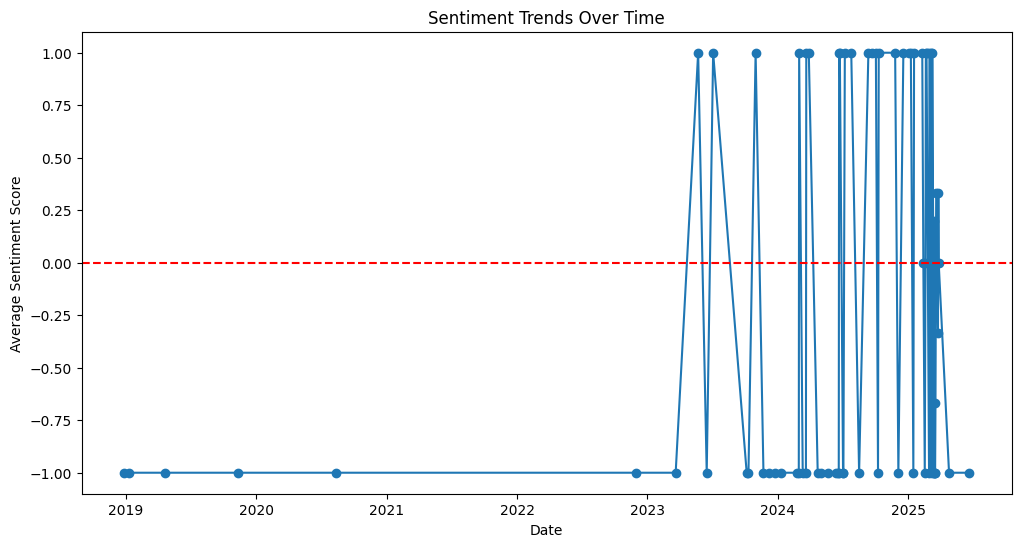

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day['date'], average_sentiment_per_day['sentiment_numeric'], marker='o')
plt.axhline(0, color='red', linestyle='--')  # Reference line at neutral (0)
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.show()



Long periods of only negative sentiment (-1.0) (2019–2022)

Extreme fluctuations from 2023 onwards

The sharp swings between -1 and +1 indicate that there are very few articles per day

The empty space in the middle mean some dates have no articles.

<ipython-input-31-89276a43a0ae>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined_with_true_sentiment['sentiment_numeric'], shade=True, color='purple')


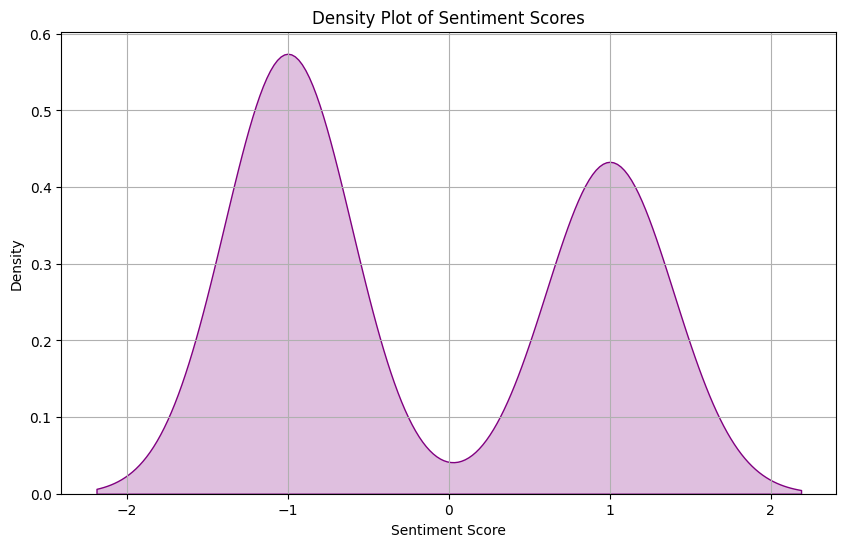

In [31]:
import seaborn as sns

# Plot a density plot to see the sentiment distribution more smoothly
plt.figure(figsize=(10, 6))
sns.kdeplot(df_combined_with_true_sentiment['sentiment_numeric'], shade=True, color='purple')
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The density plot give a smoother representation of how sentiment is distributed. It peaks around -1, this indicate a bias toward negative sentiment in the data.

 Generating a word cloud to visualize the most frequent words or topics driving the negative trend

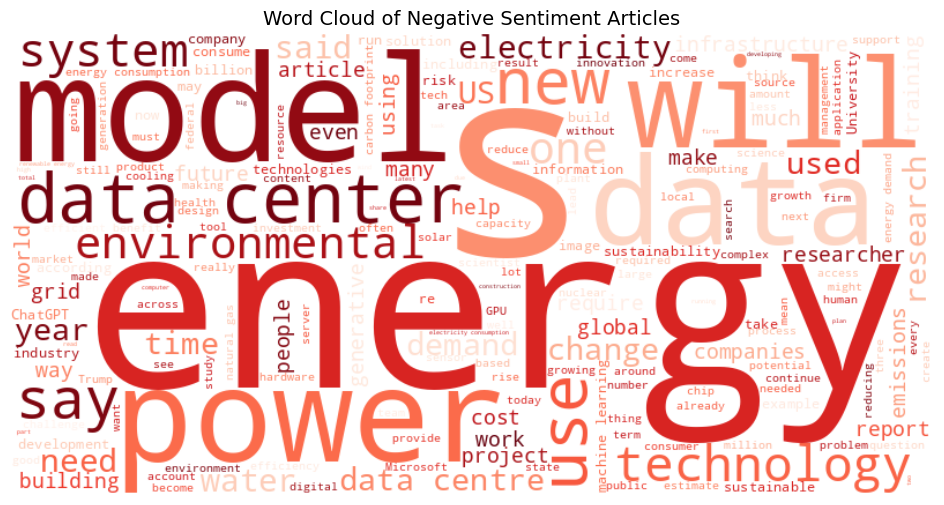

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string

# Filter only negative sentiment articles
negative_articles = df_combined_with_true_sentiment[df_combined_with_true_sentiment['sentiment_numeric'] == -1]

# Combine all negative article content into one large text
text = " ".join(negative_articles['content'].dropna())

# Define stopwords (common words to remove)
stopwords = set(STOPWORDS)
stopwords.update(["AI", "artificial", "intelligence", "climate", "impact", "Google"])  # Add domain-specific words

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Reds').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Negative Sentiment Articles", fontsize=14)
plt.show()


The word cloud suggests that the negative sentiment in articles is linked to topics like:

"Energy", "power", "electricity" → Possibly concerns about AI's energy consumption.

"Data center", "environmental", "emissions", "water" → AI's impact on sustainability.

"Model", "technology", "cost" → AI models may be seen as resource-intensive or costly.


